# Comparo version vieja y nueva cuando hay pocos puntos

In [1]:
import numpy as np
from arviz_kde import fast_kde, fast_kde2
import arviz as az
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (18, 9)
import sys
sys.path.append("../")
import src

In [2]:
idata = az.load_arviz_data("non_centered_eight")
x = np.array(idata.observed_data.obs)

In [3]:
pdf1, xmin, xmax = fast_kde(x)
grid1 = np.linspace(xmin, xmax, len(pdf1))
grid2, pdf2 = fast_kde2(x)
grid3, pdf3, bw = src.estimate_density(x, extend=False, bound_correction=True, bw_return=True)

..\src\density_utils.py:119: Warning: The estimation may be unstable for such a few data points.
Try a histogram or dotplot instead.
  ), Warning)


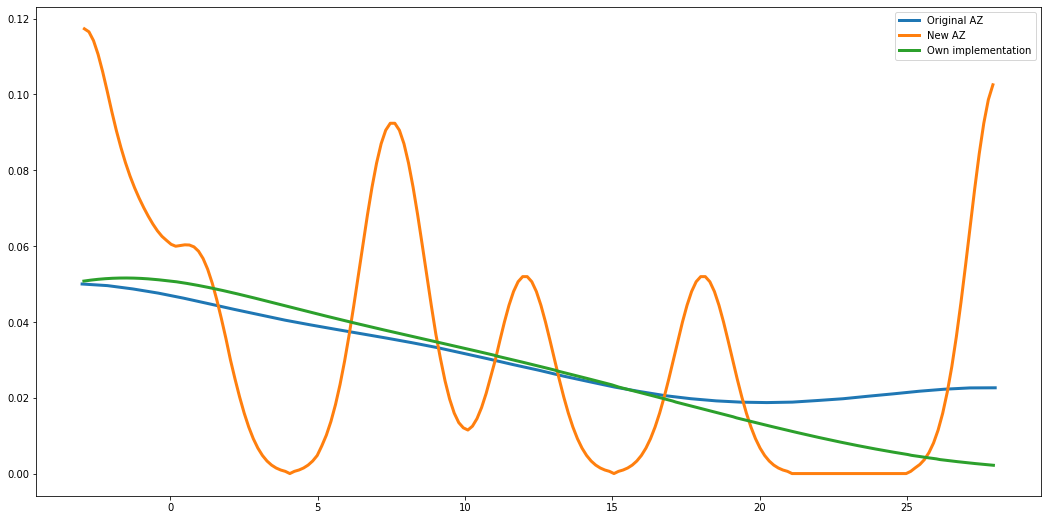

In [4]:
plt.plot(grid1, pdf1, lw=3, label="Original AZ")
plt.plot(grid2, pdf2, lw=3, label="New AZ");
plt.plot(grid3, pdf3, lw=3, label="Own implementation")
plt.legend();

In [5]:
# n_bins = min(int(len_x ** (1 / 3) * log_len_x * 2), n_points)
# n_bins = min(int(8 ** (1/3) * np.log(8) * 4.5 * 2), 200)
# print(n_bins)